In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow import keras
from tensorflow.keras.models import Sequential # model
from tensorflow.keras.layers import Activation, Dense, LeakyReLU # Type of layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from functions import *
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
physical_devices = tf.config.experimental.list_physical_devices("GPU")
print("NUM GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

NUM GPUs Available:  1


In [3]:
df = pd.read_csv("assignment-files/wine.csv", index_col="index")
columns = df.columns
print(columns)
df = df.drop_duplicates()
print(df["quality"].value_counts())

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'target'],
      dtype='object')
6    2323
5    1751
7     855
4     206
8     148
3      30
9       5
Name: quality, dtype: int64


In [4]:
y = df["quality"].values
X = df.drop(["quality","target"], axis=1).values
X_train, X_test, y_train, y_test_unnorm = train_test_split(X,y,test_size=0.2, stratify=df["target"].values, shuffle=True)
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler_y = MinMaxScaler().fit(y_train.reshape(-1,1))
y_train = scaler_y.transform(y_train.reshape(-1,1))
y_test = scaler_y.transform(y_test_unnorm.reshape(-1,1))

In [5]:
linear_model = Sequential([
    Dense(units=8,activation="relu"),
    Dense(units=16, activation="relu"),
    Dense(units=16, activation="tanh"),
    Dense(units=1)
])
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error')

history = linear_model.fit(X_train, y_train,epochs=100,
                           verbose=2,validation_split = 0.2)

Epoch 1/100
107/107 - 1s - loss: 0.1589 - val_loss: 0.0972
Epoch 2/100
107/107 - 0s - loss: 0.0989 - val_loss: 0.0950
Epoch 3/100
107/107 - 0s - loss: 0.0979 - val_loss: 0.0947
Epoch 4/100
107/107 - 0s - loss: 0.0968 - val_loss: 0.0940
Epoch 5/100
107/107 - 0s - loss: 0.0959 - val_loss: 0.0925
Epoch 6/100
107/107 - 0s - loss: 0.0953 - val_loss: 0.0928
Epoch 7/100
107/107 - 0s - loss: 0.0953 - val_loss: 0.0914
Epoch 8/100
107/107 - 0s - loss: 0.0950 - val_loss: 0.0905
Epoch 9/100
107/107 - 0s - loss: 0.0940 - val_loss: 0.0914
Epoch 10/100
107/107 - 0s - loss: 0.0942 - val_loss: 0.0898
Epoch 11/100
107/107 - 0s - loss: 0.0942 - val_loss: 0.0894
Epoch 12/100
107/107 - 0s - loss: 0.0936 - val_loss: 0.0898
Epoch 13/100
107/107 - 0s - loss: 0.0937 - val_loss: 0.0902
Epoch 14/100
107/107 - 0s - loss: 0.0933 - val_loss: 0.0892
Epoch 15/100
107/107 - 0s - loss: 0.0932 - val_loss: 0.0901
Epoch 16/100
107/107 - 0s - loss: 0.0930 - val_loss: 0.0898
Epoch 17/100
107/107 - 0s - loss: 0.0929 - val_lo

In [6]:
linear_model.save("models/linear_to_2_categories_100.h5")

In [7]:
test_results = linear_model.evaluate(
    X_test,
    y_test, verbose=2)
print(f"test loss_score: {test_results}")

34/34 - 0s - loss: 0.0895
test loss_score: 0.08951015770435333


Status at last epoch:
test_score = 0.08788680285215378
val_score  = 0.08455062657594681


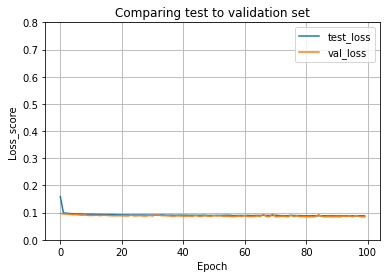

In [8]:
plot_and_print_loss(history)

In [9]:
y_pred = linear_model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred)
y_test = scaler_y.inverse_transform(y_test)
y_test_categorical = []
y_pred_categorical = []
for i, x in enumerate(y_pred):
    pred = splitting_up_good_and_bad(round(x[0]))
    test = splitting_up_good_and_bad(y_test[i])
    y_pred_categorical.append(pred)
    y_test_categorical.append(test)

<Figure size 1008x1008 with 0 Axes>

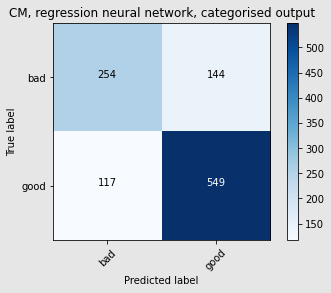

In [10]:
cm = confusion_matrix(y_test_categorical, y_pred_categorical)
plot_labels = ["bad","good"]
plot_confusion_matrix(cm=cm, classes=plot_labels,
                      title= "CM, regression neural network, categorised output")

In [11]:
print(classification_report(y_test_categorical, y_pred_categorical))

              precision    recall  f1-score   support

           0       0.68      0.64      0.66       398
           1       0.79      0.82      0.81       666

    accuracy                           0.75      1064
   macro avg       0.74      0.73      0.73      1064
weighted avg       0.75      0.75      0.75      1064



<Figure size 1008x1008 with 0 Axes>

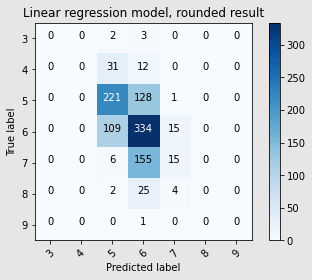

In [12]:
y_pred_classes = [round(x[0]) for x in y_pred]
cm_classes = confusion_matrix(y_test_unnorm, y_pred_classes)
plot_confusion_matrix(cm=cm_classes, classes=[3,4,5,6,7,8,9],
                      title= "Linear regression model, rounded result")